In [1]:
import numpy as np
import os, sys 

print( sys.path )
home = os.environ['HOME']
sys.path.append( home + '/src/rnpy/')
import h5py 
import hdf5plugin

import matplotlib.pyplot as plt


import pandas as pd 

['/global/scratch/projects/pc_aieqsim/scratch/rnakata/SFBA/scripts', '/global/home/users/rnakata/src/rnutils/python_modules', '/global/home/users/rnakata/src/rnpy', '/global/scratch/projects/pc_aieqsim/scratch/rnakata/SFBA/scripts', '/global/home/users/rnakata/.conda/envs/py3/lib/python311.zip', '/global/home/users/rnakata/.conda/envs/py3/lib/python3.11', '/global/home/users/rnakata/.conda/envs/py3/lib/python3.11/lib-dynload', '', '/global/home/users/rnakata/.conda/envs/py3/lib/python3.11/site-packages']


In [6]:
# read source information
fcsv = '../data/from_rn_laptop/c002_source_loc.csv'
df = pd.read_csv( fcsv )

#iloc = 4
#mysrc = df.iloc[iloc]
#print( mysrc )

mysrc = df.loc[ df.id=='360_3000'].iloc[0]
#print( df )
#mysrc = '80_2000'
print( mysrc )
datadir = '../data/b030_sim_0.5Hz/output_EQ_%s/'%mysrc.id
#datadir = '/global/scratch/projects/pc_aieqsim/scratch/rnakata/SFBA/data//b030_sim_0.5Hz/output_EQ_0_15000/'
print( datadir )


Unnamed: 0             138
lat               37.81786
lon            -122.208656
z                   3000.0
x             48791.006059
y             38537.159179
flag                  True
id                360_3000
dist               18000.0
Name: 138, dtype: object
../data/b030_sim_0.5Hz/output_EQ_360_3000/


# Plot waveforms at source & stations (BK.BRIB, BK.VAK)

## check wavelet at source and define starting time

../data/b030_sim_0.5Hz/output_EQ_360_3000//station.hdf5
<KeysViewHDF5 ['BK.BBEB', 'BK.BDM', 'BK.BKS', 'BK.BL67', 'BK.BL88', 'BK.BRIB', 'BK.BRK', 'BK.BUCI', 'BK.CMAB', 'BK.CMSB', 'BK.CRQB', 'BK.HERB', 'BK.JRSC', 'BK.LLNL', 'BK.MHDL', 'BK.OHLN', 'BK.OXMT', 'BK.PETB', 'BK.PINL', 'BK.RB2B', 'BK.RFSB', 'BK.RSRB', 'BK.SBRN', 'BK.SCCB', 'BK.SM2B', 'BK.SMCB', 'BK.STAN', 'BK.SVIN', 'BK.VAK', 'BK.VALB', 'BK.W02B', 'BK.WENL', 'BK.YBIB', 'CE.57031', 'CE.57064', 'CE.57191', 'CE.57201', 'CE.57213', 'CE.57227', 'CE.57252', 'CE.57253', 'CE.57254', 'CE.57299', 'CE.57307', 'CE.57311', 'CE.57333', 'CE.57370', 'CE.57371', 'CE.57384', 'CE.57392', 'CE.57426', 'CE.57428', 'CE.57431', 'CE.57432', 'CE.57444', 'CE.57449', 'CE.57451', 'CE.57452', 'CE.57453', 'CE.57475', 'CE.57522', 'CE.57528', 'CE.57600', 'CE.57604', 'CE.57608', 'CE.57651', 'CE.57950', 'CE.58043', 'CE.58065', 'CE.58086', 'CE.58127', 'CE.58130', 'CE.58131', 'CE.58132', 'CE.58133', 'CE.58137', 'CE.58163', 'CE.58198', 'CE.58204', 'CE.58209', 'CE.58

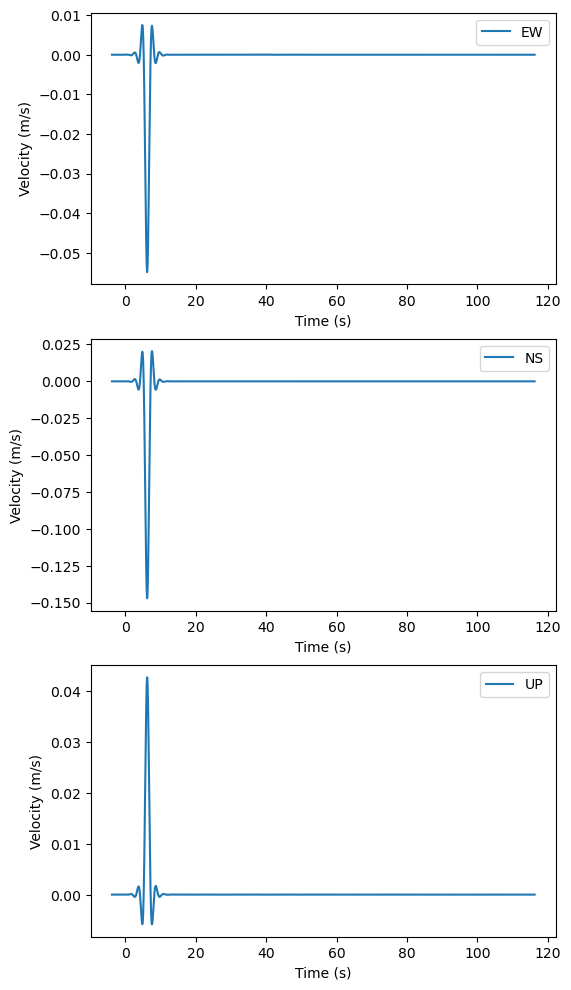

In [13]:
fin = datadir + '/station.hdf5'
print( fin )
fh1 = h5py.File( fin,'r' )

print( fh1.keys() )
dsta = fh1['EQ_%s'%mysrc.id]
print( dsta.keys() )
print( dsta['ACTUALSTX,STY,STZ'][:])

dt = fh1['DELTA'][:]
nt = dsta['EW'][:].shape[0]

eps = dsta['EW'][:].max()*1e-3
mydata = dsta['EW'][:]
iot = np.where( mydata > eps)[0][0]
ot = -iot*dt

print(ot)
t = np.arange( nt, dtype=float ) *dt + ot 

fig, axs = plt.subplots( 3,1, figsize=( 6,12 ) )
ax = axs[0]
ax.plot( t, dsta['EW'][:], label='EW' ) 
ax.set_xlabel('Time (s)' )
ax.set_ylabel('Velocity (m/s)' )

ax.legend()
ax = axs[1]
#ax.plot( t, dsta['Vns'][:], label='EW' ) 
ax.plot( t, dsta['NS'][:], label='NS' ) 
ax.set_xlabel('Time (s)' )
ax.set_ylabel('Velocity (m/s)' )
ax.legend()
ax = axs[2]
ax.plot( t, dsta['UP'][:], label='UP' ) 
ax.set_xlabel('Time (s)' )
ax.set_ylabel('Velocity (m/s)' )
ax.legend()


## check wavefors at stations

(3, 4614)
(3, 2308)
[99900. 43500.     0.]
(3, 4614)
(3, 2308)
[41250. 37500.     0.]


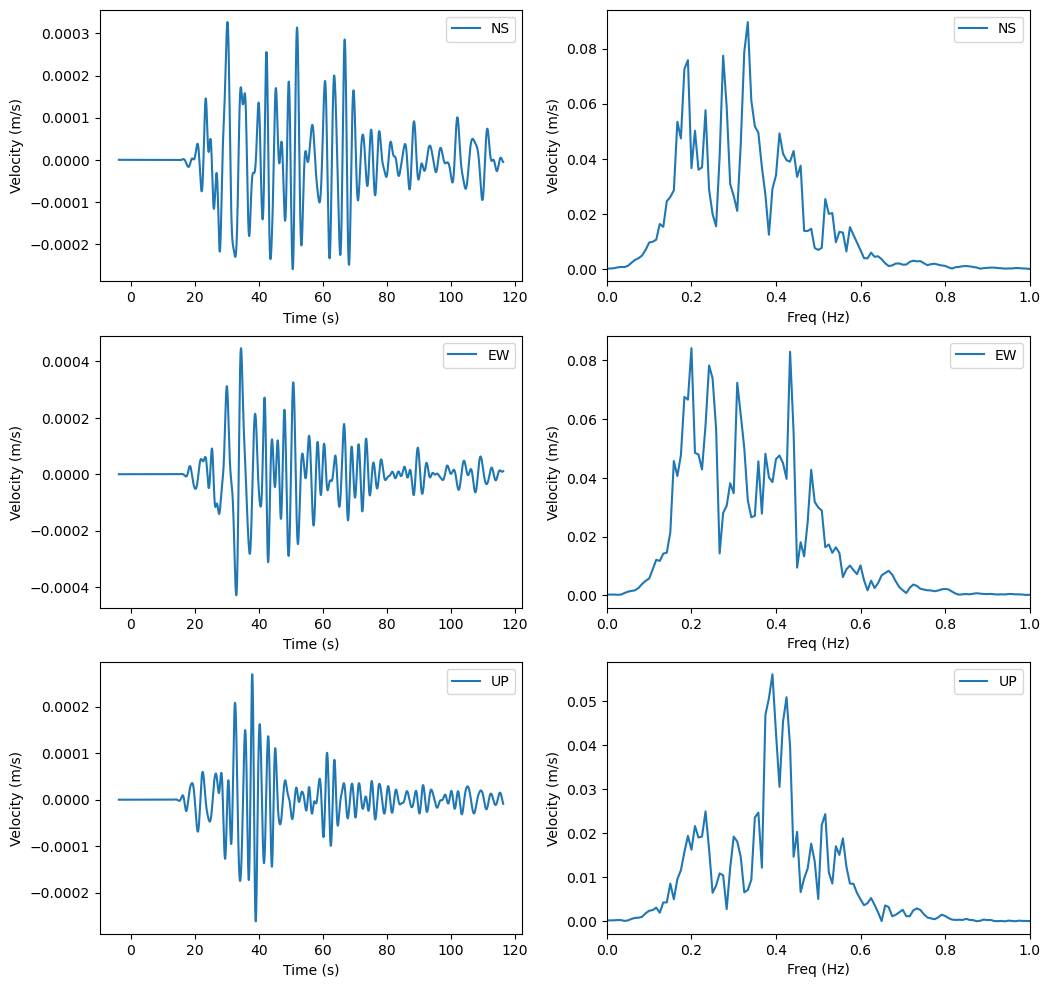

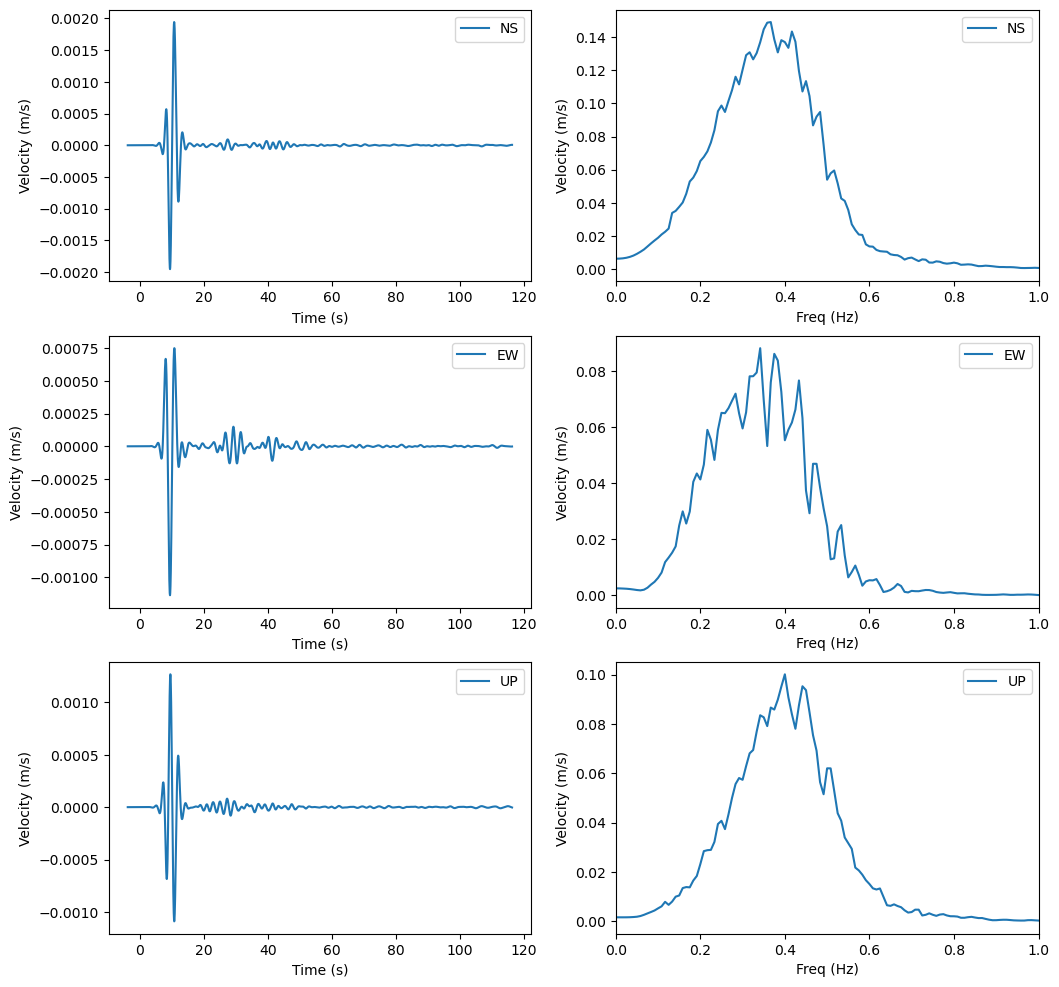

In [19]:
import rn.libs.fourier as rn_f
import rn.libs.normalize as rn_normalize


for idx, sta in enumerate( ['NP.1788', 'BK.VAK'] ) :
    fig, axs = plt.subplots( 3,2, figsize=( 12,12 ) )
    dsta = fh1[sta]

    mydata = np.zeros( ( 3, nt ) )
    mydata[0,:] = dsta['EW'][:]
    mydata[1,:] = dsta['NS'][:]
    mydata[2,:] = dsta['UP'][:]
    
    fd, f = rn_f.rfft( mydata, t=t )
    
    fd = np.abs( fd )
    print( dsta['ACTUALSTX,STY,STZ'][:])

    labels = ['NS','EW','UP']
    for iv in range(3) :
        ax = axs[iv][0]
        ax.plot( t, mydata[iv, :] , label=labels[iv] ) 
        ax.set_xlabel('Time (s)' )
        ax.set_ylabel('Velocity (m/s)' )
        ax.legend()
        ax = axs[iv][1]
        ax.plot( f, fd[iv, :] , label=labels[iv] ) 
        ax.set_xlabel('Freq (Hz)' )
        ax.set_ylabel('Velocity (m/s)' )
        ax.set_xlim( 0, 1 )
        ax.legend()
    
    
    

    
    
    


# check surface ground motions

In [9]:
comps = { 'velx' : 'vel_0 ijk layout',
          'vely' : 'vel_1 ijk layout',
          'velz' : 'vel_2 ijk layout'}

comp_keys = ['velx','vely','velz']

In [10]:
hdf5File = h5py.File( datadir + '/image.ssi', 'r' ) 
hdataset = comps['velx']
dset = hdf5File[ hdataset ] 

nt, nx, ny, nz = hdf5File[ hdataset ].shape
print( nt, nx, ny, nz )
data = np.zeros( ( 3, nx, ny, nt ), dtype=np.float32 )

ox = 0.
oy = 0.


dt2= hdf5File['timestep'][0]*10
t = np.arange( nt ) * dt2 +ot
x = np.arange( nx ) * 0.15 + ox 
y = np.arange( ny ) * 0.15 + oy
print( x[-1], y[-1], t[-1])

461 801 535 1
120.0 80.1 115.88987646200071


In [8]:
for idx, comp in enumerate( comp_keys ) :

    hdataset = comps[ comp ]
    dset = hdf5File[ hdataset ] 
    data[idx, :, :, :] = dset[ :nt, :, :, 0 ].transpose( 1, 2, 0)  

In [9]:
print( dt2*30*2 )

15.608064166486017


Text(0.5, 1.0, 't of PGV (s)')

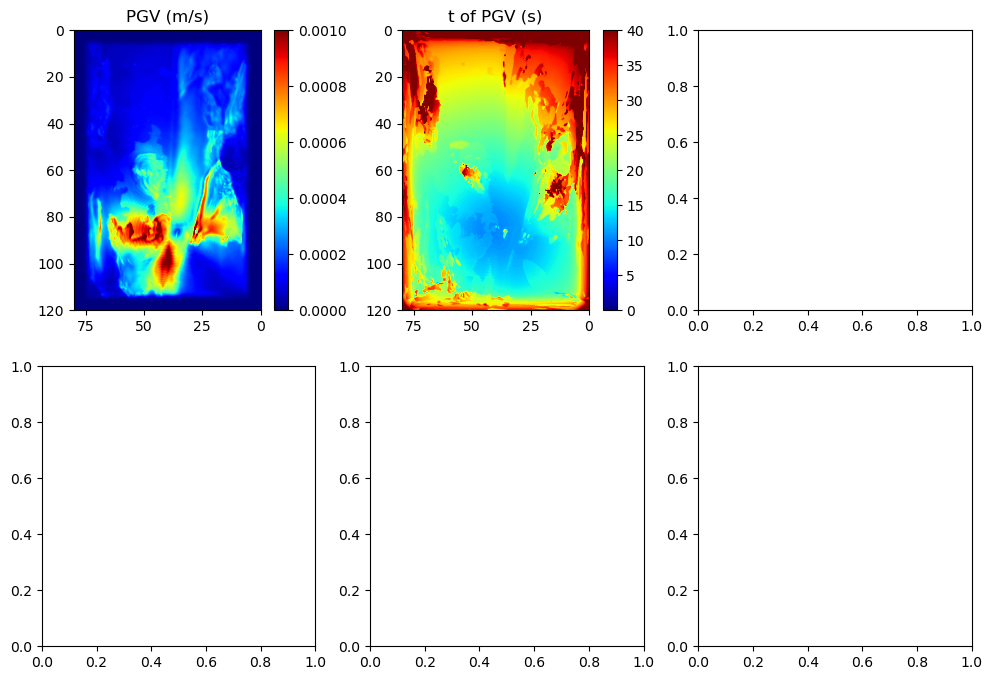

In [10]:
fig, axs = plt.subplots( 2, 3, figsize=( 12,8 ))
tmp = np.sqrt( data[0, :, :, :] **2 + data[1, :, :, :] **2 )
pgv = tmp.max( axis=-1 )
itmax = np.argmax( tmp, axis=-1)
tmax = t[itmax]

extent = ( y[0], y[-1], x[-1], x[0])
ax = axs[0][0]
im = ax.imshow( pgv , extent=extent, vmin=0, vmax=1e-3, cmap='jet')
plt.colorbar( im )
ax.invert_xaxis() 
ax.set_title('PGV (m/s)')

ax = axs[0][1]
im = ax.imshow( tmax , extent=extent, vmin=0, vmax=40, cmap='jet')
plt.colorbar( im )
ax.invert_xaxis() 
ax.set_title('t of PGV (s)')



#ax.invert_xaxis() 

(801, 535, 461)
(801, 535, 231)
(801, 535, 461)
(801, 535, 231)
(801, 535, 461)
(801, 535, 231)


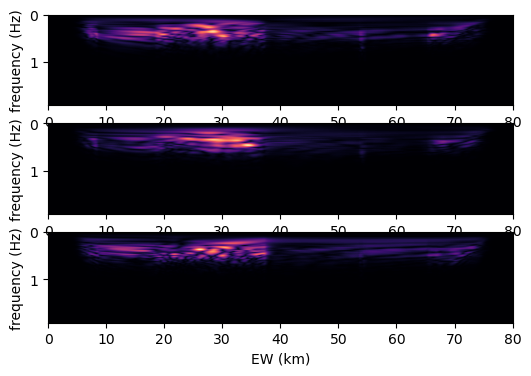

In [11]:
#try :
import rn.libs.fourier as rn_f
import rn.libs.normalize as rn_normalize
fig, axs = plt.subplots( 3, figsize=(6,4 ))

for idx, comp in enumerate( comp_keys ) :
    fdata,f  = rn_f.rfft( data[idx,:,:,:], t=t )
    ax = axs[idx]
    #ax.imshow( np.log( np.abs( fdata[100,:,: ].T ) ) , extent=( y[0], y[-1], f[-1], f[0]), cmap='magma', aspect='auto' )
    ax.imshow( np.abs( fdata[100,:,: ].T  ) , extent=( y[0], y[-1], f[-1], f[0]), cmap='magma', aspect='auto' )

    ax.set_xlabel('EW (km)')
    ax.set_ylabel('frequency (Hz)')
    
    
#except: 
#    print('do not find rn library')

(3, 801, 535, 461)


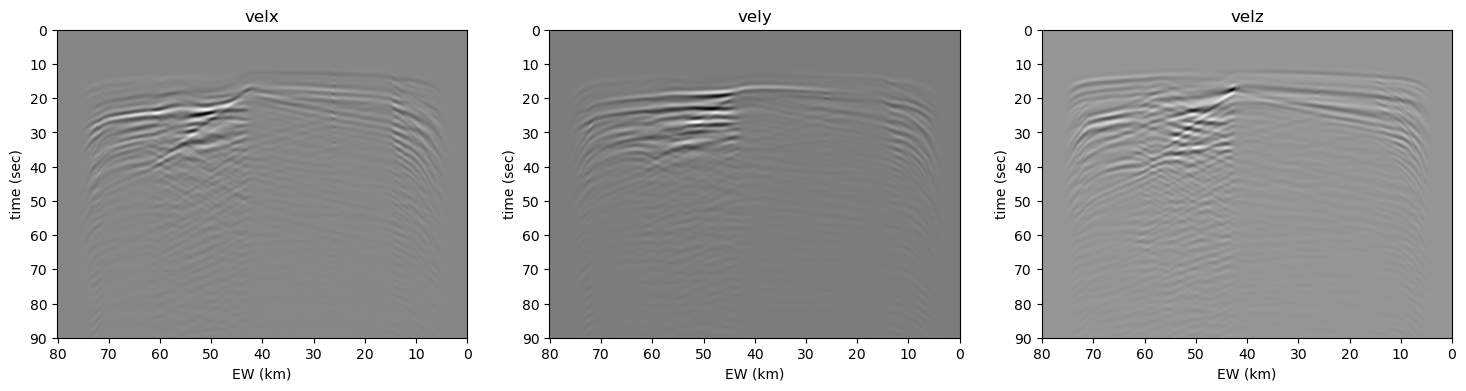

In [12]:
fig, axs = plt.subplots( 1,3, figsize=(6*3,4 ))

print( data.shape)
for idx, comp in enumerate( comp_keys ) :
    ax = axs[idx]
    ax.imshow( data[ idx, 100, :, : ].T, extent=( y[-1], y[0], t[-1], t[0]), cmap='gray', aspect='auto' )
    ax.set_ylabel('time (sec)')
    ax.set_xlabel('EW (km)')
    ax.set_title(comp)
    ax.set_ylim([90,0])



In [ ]:

amaxs = np.abs( data.reshape((3, nx*ny*nt)) ).max( axis=-1) 
print( amaxs ) 



it =65
#ix = np.argmin( np.abs(x-12.35) ) #[0]

sta1_x, sta1_y, sta1_z = fh1['BK.BRIB']['ACTUALSTX,STY,STZ'][:]*1e-3
ix = np.argmin( np.abs(x-sta1_x) ) #[0]
iy = np.argmin( np.abs(y-sta1_y) ) #[0]

sta2_x, sta2_y, sta2_z = fh1['BK.VAK']['ACTUALSTX,STY,STZ'][:]*1e-3
ix2 = np.argmin( np.abs(x-sta2_x) ) #[0]
iy2 = np.argmin( np.abs(y-sta2_y) ) #[0]

#ix=100
for it in range( 45, 168 ) :
    fig, axs = plt.subplots( 3,3, figsize=(6*3,8*3 ))
    for idx, comp in enumerate( comp_keys ) :
        ax = axs[0][idx]
        cim = ax.imshow( data[ idx, :, :, it]  , extent=( y[0], y[-1], x[-1], x[0]), 
                        cmap='gray', aspect='equal', vmin=-amaxs[idx]*0.3, vmax=amaxs[idx]*0.3 )
        ax.set_ylabel('NS (km)')
        ax.set_xlabel('EW (km)')
        ax.set_title('%s %.1f sec'%(comp, t[it]) )
        ax.set_xlim([y[-1],y[0]])
        ax.axhline( x[ix])
        ax.axhline( x[ix2])
        ax.plot( sta1_y, sta1_x, 'yo', markersize=12)
        ax.plot( sta2_y, sta2_x, 'yo', markersize=12)
        plt.colorbar(cim, location='bottom')


        ax = axs[1][idx]
        ax.imshow( data[ idx, ix, :, : ].T, extent=( y[0], y[-1], t[-1], t[0]), 
                      vmin=-amaxs[idx]*0.3, vmax=amaxs[idx]*0.3,
                      cmap='gray', aspect='auto' )
        ax.set_ylabel('time (sec)')
        ax.set_xlabel('EW (km)')
        ax.set_title(comp)
        ax.axhline( t[it], color='r', linestyle=':')
        ax.axvline( y[iy], color='y')
        ax.set_xlim([y[-1],y[0]])
        ax.set_ylim([25,0])


        ax = axs[2][idx]
        ax.imshow( data[ idx, ix2, :, : ].T, extent=( y[0], y[-1], t[-1], t[0]), 
                      vmin=-amaxs[idx]*0.3, vmax=amaxs[idx]*0.3,
                      cmap='gray', aspect='auto' )
        ax.set_ylabel('time (sec)')
        ax.set_xlabel('EW (km)')
        ax.set_title(comp)
        ax.axhline( t[it], color='r', linestyle=':')
        ax.axvline( y[iy2], color='y')
        ax.set_xlim([y[-1],y[0]])
        ax.set_ylim([25,0])
    fig.savefig( 'movie_EQ_%s_%3.3d.png'%( mysrc.id, it) )
    plt.close(fig)

[0.00151472 0.00132166 0.0005986 ]
